<a href="https://colab.research.google.com/github/talxa/Mr_clean/blob/main/mr_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import re
import seaborn as sb

In [ ]:
def get_content(article_name):
  params = {
            'action': 'query',
            'prop': 'extracts',
            'titles': article_name,
            'format': 'json',
        }
  req = requests.get('https://en.wikipedia.org/w/api.php', params=params)
  data = req.json()
  data = data['query']['pages']['22834']['extract']
  html = re.compile('<.*?>')
  clean = re.sub(html, '', data)  
  return clean
data = get_content('Ozone_layer')

In [ ]:
def merge_contents(data):
  remove = re.split("\. |, |\.|\n| |-|\'", data) 
  return remove
content = merge_contents(data)

In [ ]:
def tokenize(content):
  special_char_removed = [word for word in content if word.isalnum()]
  num_removed = [word for word in special_char_removed if not word.isdigit()]
  return num_removed
collection = tokenize(content)

In [ ]:
def lower_collection(collection):
  return [word.lower() for word in collection]
words = lower_collection(collection)

In [ ]:
stop_words = ["uv", "s", "o", "m", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]

def remove_stop_words(words, stop_words):
  txt_without_stop = [word for word in words if word not in stop_words]
  return txt_without_stop
without_stop_words = remove_stop_words(words, stop_words)

In [ ]:
def count_frequency(collection):
  frequency = {}
  for word in collection:
    if word in frequency:
      frequency[word] +=1
    else:
      frequency[word] = 1 
  frequencies = {k : v for k, v in sorted(frequency.items(),
                                          key = lambda item: item[1],
                                          reverse = True)}
  return frequencies
frequencies = count_frequency(without_stop_words)

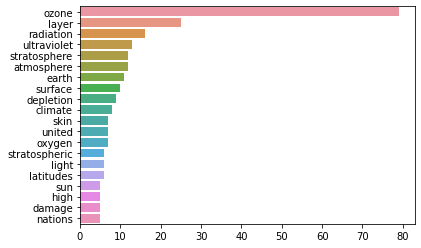

In [ ]:
def print_most_frequent(frequencies, n):
    keys = [k for k,v in frequencies.items()]
    values = [v for k,v in frequencies.items()]
    most_frequent = sb.barplot(x= values[0:n] ,y= keys[0:n])
print_most_frequent(frequencies, 20)